In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('../data/data-logistic.csv', names=['y', 'x1', 'x2'])

In [4]:
df.head()

,y,x1,x2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [5]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

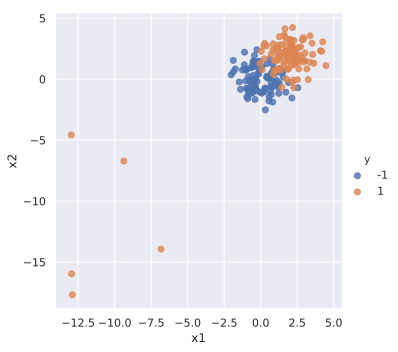

In [6]:
sns.lmplot('x1', 'x2', data=df, hue='y', fit_reg=False)

In [176]:
def make_step(W, df, k: float, C: float=10.0):
    X = df[['x1', 'x2']]
    y = df['y']
    
    sigma = np.multiply(y, np.sum(np.multiply(W, X), axis=1))
    sigma = sigma.map(lambda val: 1.0 - 1.0 / (1.0 + np.exp(-1 * val)))
    
    S = np.multiply(sigma, y)
    S1 = np.multiply(S, df['x1'])
    S2 = np.multiply(S, df['x2'])
    
    w1 = W[0] + k * np.mean(S1) - k*C*W[0]
    w2 = W[1] + k * np.mean(S2) - k*C*W[1]
                   
    return np.array((w1, w2), dtype='float')

In [179]:
W = np.array((0.0, 0.0), dtype='float')
print(W)
make_step(W, df, 0.1, 10)

[0. 0.]


array([0.03573127, 0.03245997])

In [205]:
def sgm(val: float) -> float:
    return 1.0 / (1.0 + np.exp(-1.0 * val))

def get_score(W, df) -> float:
    A = np.sum(np.multiply(df[['x1', 'x2']], W), axis=1)
    A = np.vectorize(sgm)(A)
    return roc_auc_score(df['y'], A)

def get_error(W1, W2) -> float:
    return np.sqrt(np.square(W1[0] - W2[0]) + np.square(W1[1] - W2[1]))

In [210]:
def get_result(C: int=10) -> float:
    N = 10000
    e = 1e-5
    W = np.array((0.0, 0.0), dtype='float')
    W0 = np.array((1000, 1000), dtype='float') # false point


    while N > 0 and get_error(W, W0) >= e:
        W0 = W
        W = make_step(W, df, 0.1, C)
        N -= 1

    if get_error(W, W0) >= e and N <= 0:
        raise Exception('Cry')
    # print
    # print(f'N = {N}, e = {get_error(W, W0)}')
    # print(f'Score = {get_score(W, df)}')
    # print('W = ', W)
    return get_score(W, df)

In [211]:
get_result()

0.9362857142857142

In [212]:
get_result(0)

0.9268571428571428